# Scikit-Learn

* [Preprocess dataset](#preprocess_dataset)
  * [Divide into train and test](#divide_train_test)
  * [PCA](#PCA)
* [Clustering](#clustering)
  * [Silhouette](#silhouette)
* [Classifier](#classifier)
  * [Predict](#predict)
  * [Evaluate](#evaluate)

In [4]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt 

### Load Dataset
iris = datasets.load_iris()

X = iris.data
y = iris.target

print(X[:10])
print(y[:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[0 0 0 0 0 0 0 0 0 0]


<a id='preprocess_dataset'></a>
## Preprocess dataset

<a id='divide_train_test'></a>
### Divide into train and test

In [2]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print("From the datasets X and y")
print(np.shape(X) )
print(np.shape(y) )
print("It has been split into train and test:")
print("Size of train:")
print(np.shape(x_train) )
print(np.shape(y_train) )
print("Size of test:")
print(np.shape(x_test) )
print(np.shape(y_test) )


From the datasets X and y
(150, 4)
(150,)
It has been split into train and test:
Size of train:
(120, 4)
(120,)
Size of test:
(30, 4)
(30,)


<a id='PCA'></a>
### PCA
Define a function to compute PCA and perform a scatterplot

In [10]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
def plot_dataset(X,colors):
    pca = PCA(n_components=2)
    pca.fit(X)
    principalComponents = pca.fit_transform(X)
    plt.scatter(principalComponents[:, 0], principalComponents[:, 1],c=colors)
    plt.show()


<a id='clustering'></a>
## Clustering

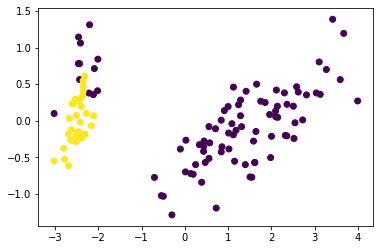

In [14]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.3, min_samples=5).fit(x_train)

#use db.labels_ as colors
plot_dataset(x_train,db.labels_)

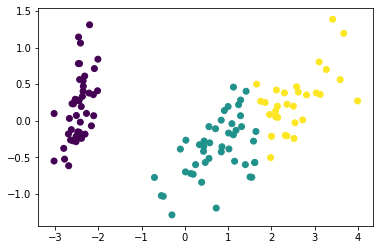

In [13]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(x_train)
plot_dataset(x_train,kmeans.labels_)

<a id='silhouette'></a>
### Silhouette

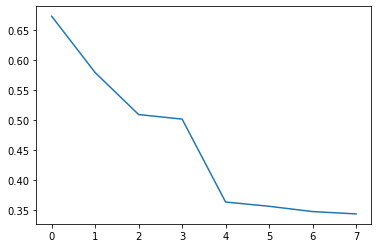

In [18]:
from sklearn import metrics

silhouette_scores=[]
for i in range(2,10):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(x_train)
    labels = kmeans.labels_
    silhouette=metrics.silhouette_score(x_train, labels, metric='euclidean')
    silhouette_scores.append(silhouette)

plt.plot(silhouette_scores)
plt.show()

<a id='classifier'></a>
## Classifier

In [21]:
### Train KNN
from sklearn import neighbors
n_neighbors = 15
clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(x_train,  y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

<a id='predict'></a>
### Predict

In [22]:
# Make a prediction
y_predicted = clf.predict( x_test )
print(y_predicted)

[1 1 2 1 1 2 2 1 0 2 2 2 1 0 2 1 2 0 1 2 1 1 0 0 2 2 1 2 1 2]


<a id='evaluate'></a>
### Evaluate

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predicted)

array([[ 5,  0,  0],
       [ 0, 10,  1],
       [ 0,  2, 12]])

In [25]:
from sklearn.metrics import precision_recall_fscore_support
precision,recall,f_score,support = precision_recall_fscore_support(y_test, y_predicted, average='macro')
print(precision)
print(recall)
print(f_score)

0.9188034188034188
0.9220779220779222
0.9194847020933977
